<a href="https://colab.research.google.com/github/Djaxis/LA-PLATEFORME/blob/main/paris_trees_de_campos_brice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Présentation générale du jeu de données.**

**Comprendre les colonnes du jeu de données:**

1. **id :** Identifiant unique pour chaque entrée.
2. **type_emplacement :** Type d'emplacement (probablement catégorique).
3. **domanialite :** Domaine auquel appartient l'emplacement.
4. **arrondissement :** Arrondissement où se trouve l'emplacement.
5. **complement_addresse :** Informations supplémentaires sur l'adresse.
6. **numero :** Numéro (semble contenir uniquement des valeurs nulles).
7. **lieu :** Lieu associé à l'emplacement.
8. **id_emplacement :** Identifiant unique de l'emplacement.
9. **libelle_francais :** Libellé en français (peut être le nom de la plante ou de l'arbre).
10. **genre :** Genre de la plante ou de l'arbre.
11. **espece :** Espèce de la plante ou de l'arbre.
12. **variete :** Variété de la plante ou de l'arbre.
13. **circonference_cm :** Circonférence en centimètres.
14. **hauteur_m :** Hauteur en mètres.
15. **stade_developpement :** Stade de développement de la plante ou de l'arbre.
16. **remarquable :** Indicateur de remarquabilité.
17. **geo_point_2d_a :** Coordonnée géographique A.
18. **geo_point_2d_b :** Coordonnée géographique B.


La colonne "remarquable" semble être un indicateur qui peut prendre des valeurs booléennes (True/False) ou équivalentes. Cela suggère probablement si l'élément en question est remarquable ou non. Voici une brève explication :

- **remarquable :**Un élément remarquable peut avoir des caractéristiques spéciales, historiques ou esthétiques qui le distinguent. Il peut être utilisé pour identifier des arbres ou plantes spéciaux dans un contexte particulier, par exemple, des arbres remarquables dans une ville, un parc ou une zone spécifique.

### **Exploration initiale des données**
- mise en place de la data au format adéquat pour comprendre les colonnes et les lignes : df.columns, df.info, df.isnull().sum()
- Supprimer les colonnes inutiles en comparant le nombre de lignes aux colonnes df.isnull : La colonne "numero" semble contenir uniquement des valeurs nulles et n'as aucun intérêt sauf si on voulais attribuer un chiffre pour chaque arbres.(à réfléchir)
- Gérer les doublons : lignes avec df.drop_duplicates()
- Normaliser les noms de colonnes : pour une meilleur visibilité.
- Gérer les valeurs manquantes :

La colonne Type_Emplacement ne s'avère pas intéressante car elle aprsè avoir fait un nunique il n'y a qu'une valeur sur toutes les lignes pour nous indiquer que cela est un arbre.

Je détail maintenant le nombre d'occurence pour chaque valeur de chaque colonnes afin de visualiser les comportement de chaque colonne et statuer sur celle qui me semble etre les plus importantes et utiles.

Choix des visualisations pour chaque colonne de la data initiale en fonction des valeurs de la colonnes et sont type.


### **◆ :Démarche méthodologique d’analyse de données.**


In [ ]:
!pip install contextily

In [ ]:
from google.colab import drive
import os.path
import pandas as pd
import csv
import json
import plotly.express as px
import requests
import seaborn as sns
import time
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import gdown
import numpy as np
from itertools import count
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from datetime import datetime, timedelta
import plotly.express as px
import missingno as msno
import geopandas as gpd
from shapely.geometry import Point,polygon
import contextily as ctx
import missingno as msno


In [ ]:
url = 'https://drive.google.com/uc?id=1ZAUfA7Flj9ifeR4ACz-y-TpLuOrMt21Q'
output = 'data_paris_trees.csv'
gdown.download(url, output, quiet=False)
df = pd.read_csv('data_paris_trees.csv', sep=';')

#MISE EN FORME PROPRE
df = df.dropna(axis=1, how='all')
df = df.drop_duplicates()
df.columns = df.columns.str.title().str.replace(' ', '_')


Downloading...
From: https://drive.google.com/uc?id=1ZAUfA7Flj9ifeR4ACz-y-TpLuOrMt21Q
To: /content/data_paris_trees.csv
100%|██████████| 29.0M/29.0M [00:00<00:00, 94.0MB/s]


In [ ]:
!pip install gdown


NOMBRE DE LIGNES ET COLONNES AVEC SHAPE:  (200137, 17)

DETECTION DES DOUBLONS : 0

NOM DES COLONNES  :
Index(['Id', 'Type_Emplacement', 'Domanialite', 'Arrondissement',
       'Complement_Addresse', 'Lieu', 'Id_Emplacement', 'Libelle_Francais',
       'Genre', 'Espece', 'Variete', 'Circonference_Cm', 'Hauteur_M',
       'Stade_Developpement', 'Remarquable', 'Geo_Point_2D_A',
       'Geo_Point_2D_B'],
      dtype='object')

INFOS GENERALES SUR LA DATA :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200137 entries, 0 to 200136
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   200137 non-null  int64  
 1   Type_Emplacement     200137 non-null  object 
 2   Domanialite          200136 non-null  object 
 3   Arrondissement       200137 non-null  object 
 4   Complement_Addresse  30902 non-null   object 
 5   Lieu                 200137 non-null  object 
 6   Id_Emplacement    

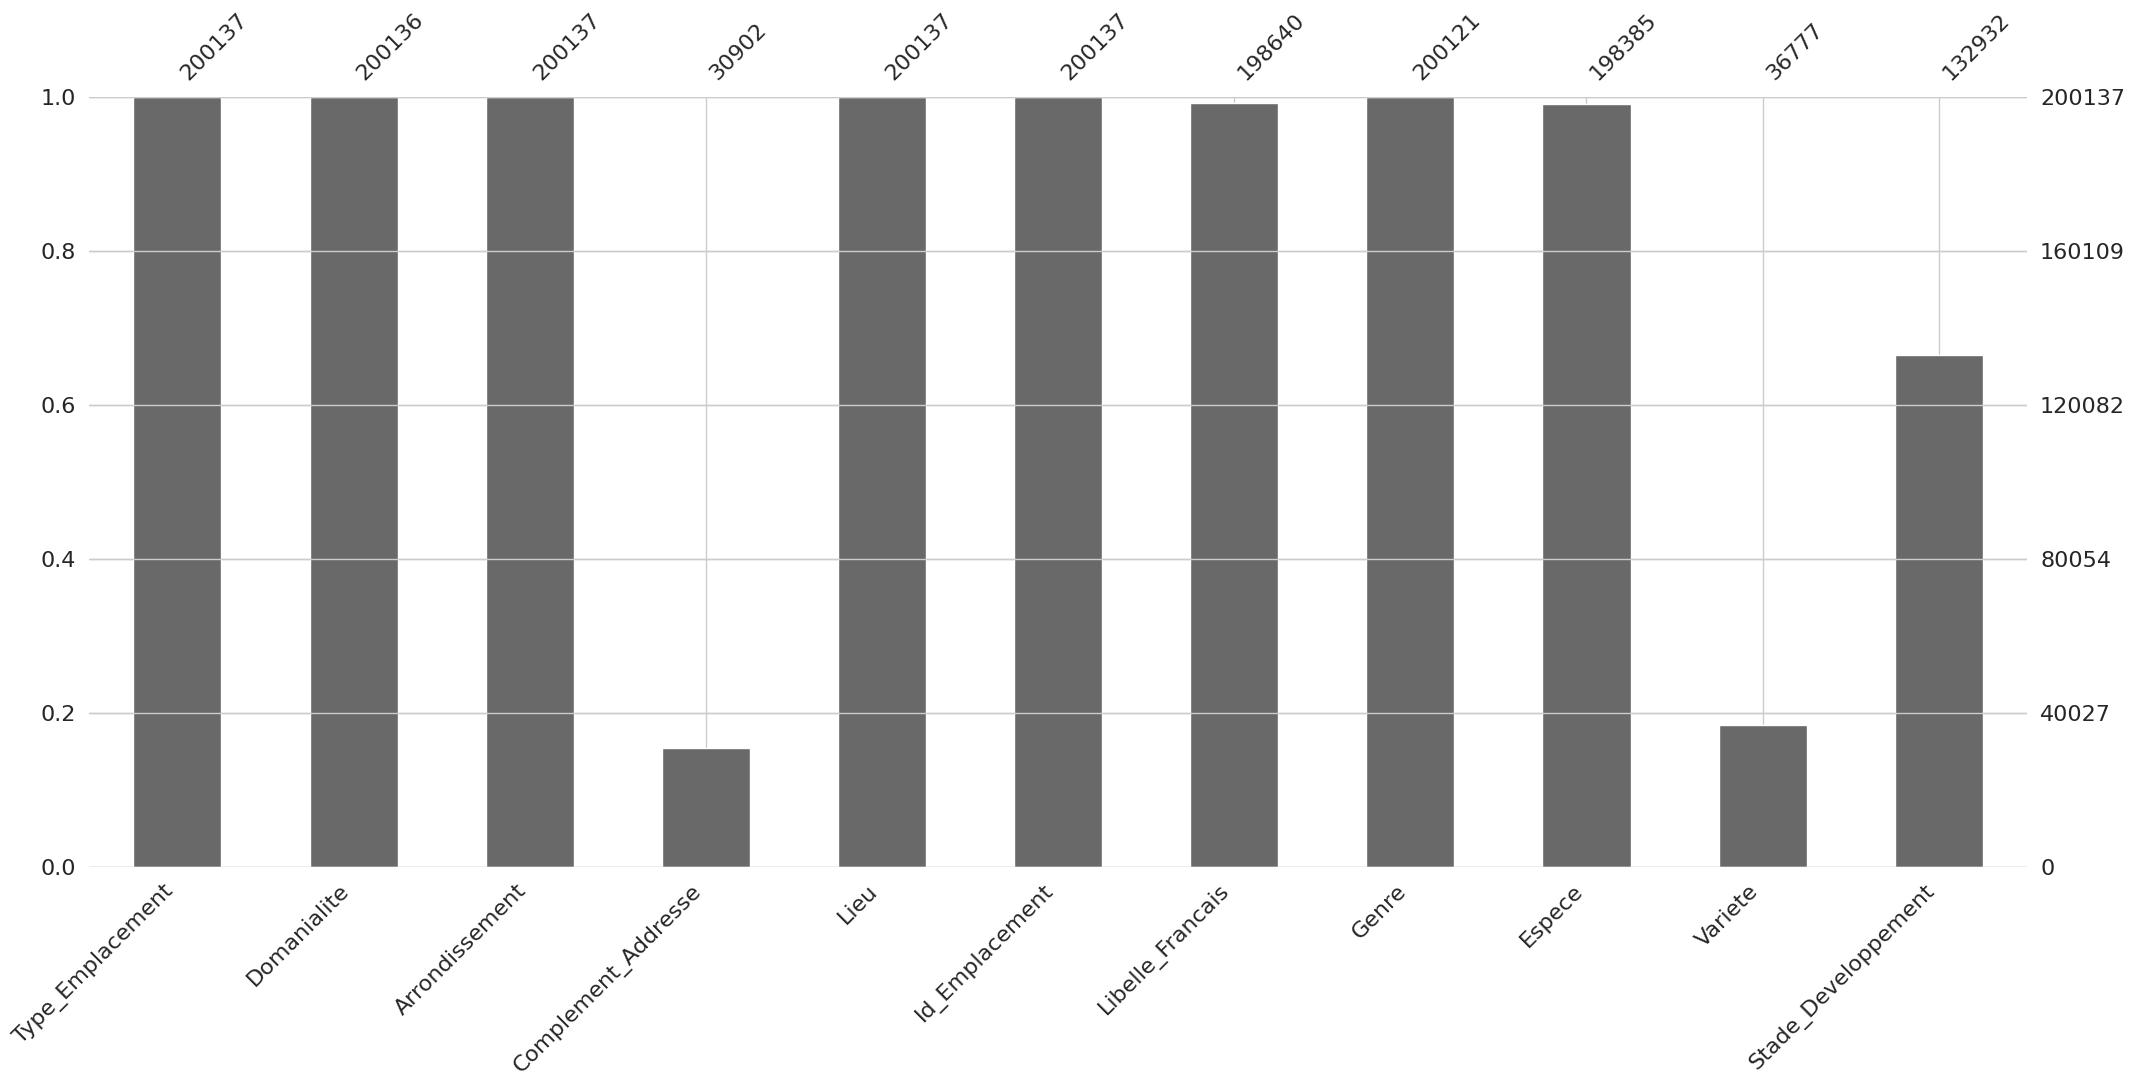

In [ ]:
print('NOMBRE DE LIGNES ET COLONNES AVEC SHAPE: ',df.shape)
print()
print('DETECTION DES DOUBLONS :', df.duplicated().sum())
print()
print('NOM DES COLONNES  :')
print(df.columns)
print()
print('INFOS GENERALES SUR LA DATA :')
df.info()
print()
print()
missing_values = df.isnull().sum()
print("VALEURS MANQUANTES PAR COLONNE :")
print(missing_values)
print()
print("VALEURS unique PAR COLONNES :")
print(df.nunique())
print()
comptage_remarquable = df['Remarquable'].value_counts(dropna=False)
print(comptage_remarquable)

print('VISUALISATION EN BARRE DES VALEURS DE CHAQUE COLONNE')
plt.figure(figsize=(4, 2))
color = (0.53, 0.66, 0.78)
msno.bar(df.select_dtypes('object'))
plt.show()

In [ ]:
unique_values = df['Stade_Developpement'].unique()
unique_values

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

In [ ]:
df['Stade_Developpement'].value_counts()

A     64438
JA    35444
J     26937
M      6113
Name: Stade_Developpement, dtype: int64

In [ ]:
# Créez un dictionnaire de remplacement pour les noms de valeurs
noms_valeurs = {'A': 'Adulte', 'JA': 'Jeune Adulte', 'J': 'Jeune', 'M': 'Mature'}

# Remplacez les noms de valeurs dans la colonne
df['Stade_Developpement'] = df['Stade_Developpement'].map(noms_valeurs)

# Affichez le DataFrame mis à jour
print(df)



             Id Type_Emplacement Domanialite     Arrondissement  \
0         99874            Arbre      Jardin     PARIS 7E ARRDT   
1         99875            Arbre      Jardin     PARIS 7E ARRDT   
2         99876            Arbre      Jardin     PARIS 7E ARRDT   
3         99877            Arbre      Jardin     PARIS 7E ARRDT   
4         99878            Arbre      Jardin    PARIS 17E ARRDT   
...         ...              ...         ...                ...   
200132  2024741            Arbre      Jardin  BOIS DE VINCENNES   
200133  2024742            Arbre      Jardin  BOIS DE VINCENNES   
200134  2024743            Arbre      Jardin  BOIS DE VINCENNES   
200135  2024744            Arbre      Jardin  BOIS DE VINCENNES   
200136  2024745            Arbre      Jardin  BOIS DE VINCENNES   

       Complement_Addresse                                               Lieu  \
0                      NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E   
1                      NaN       

In [ ]:
df['Stade_Developpement'].nunique()
df['Stade_Developpement'].value_counts()
df['Stade_Developpement'].value_counts()

Adulte          64438
Jeune Adulte    35444
Jeune           26937
Mature           6113
Name: Stade_Developpement, dtype: int64

In [ ]:
print('RESUME STATISTIQUE')
print(df.describe())
print(df.corr())

RESUME STATISTIQUE
                 Id  Circonference_Cm      Hauteur_M    Remarquable  \
count  2.001370e+05     200137.000000  200137.000000  137039.000000   
mean   3.872027e+05         83.380479      13.110509       0.001343   
std    5.456032e+05        673.190213    1971.217387       0.036618   
min    9.987400e+04          0.000000       0.000000       0.000000   
25%    1.559270e+05         30.000000       5.000000       0.000000   
50%    2.210780e+05         70.000000       8.000000       0.000000   
75%    2.741020e+05        115.000000      12.000000       0.000000   
max    2.024745e+06     250255.000000  881818.000000       1.000000   

       Geo_Point_2D_A  Geo_Point_2D_B  
count   200137.000000   200137.000000  
mean        48.854491        2.348208  
std          0.030234        0.051220  
min         48.742290        2.210241  
25%         48.835021        2.307530  
50%         48.854162        2.351095  
75%         48.876447        2.386838  
max         48.911485

<ipython-input-103-38fbdbf62a96>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [ ]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# df_Domanialite.plot(kind='bar', ax=axes[0], title='Domanialite - Barres')
# df_Domanialite.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', title='Domanialite - Camembert')
# df_Domanialite.plot(kind='area', ax=axes[2], title='Domanialite - Secteurs')

# for idx, value in enumerate(df_Domanialite):
#     axes[2].text(idx, value, str(value), ha='center', va='bottom')

# plt.tight_layout()
# print('VISUALISATION DES ARBRES PAR DOMANIALITE')
# plt.show()


### **LES REPARTITIONS**

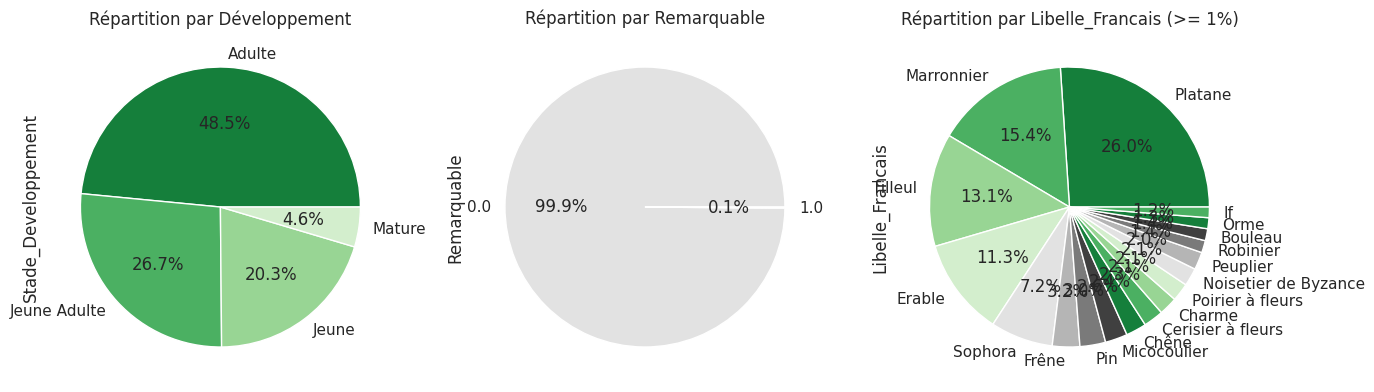

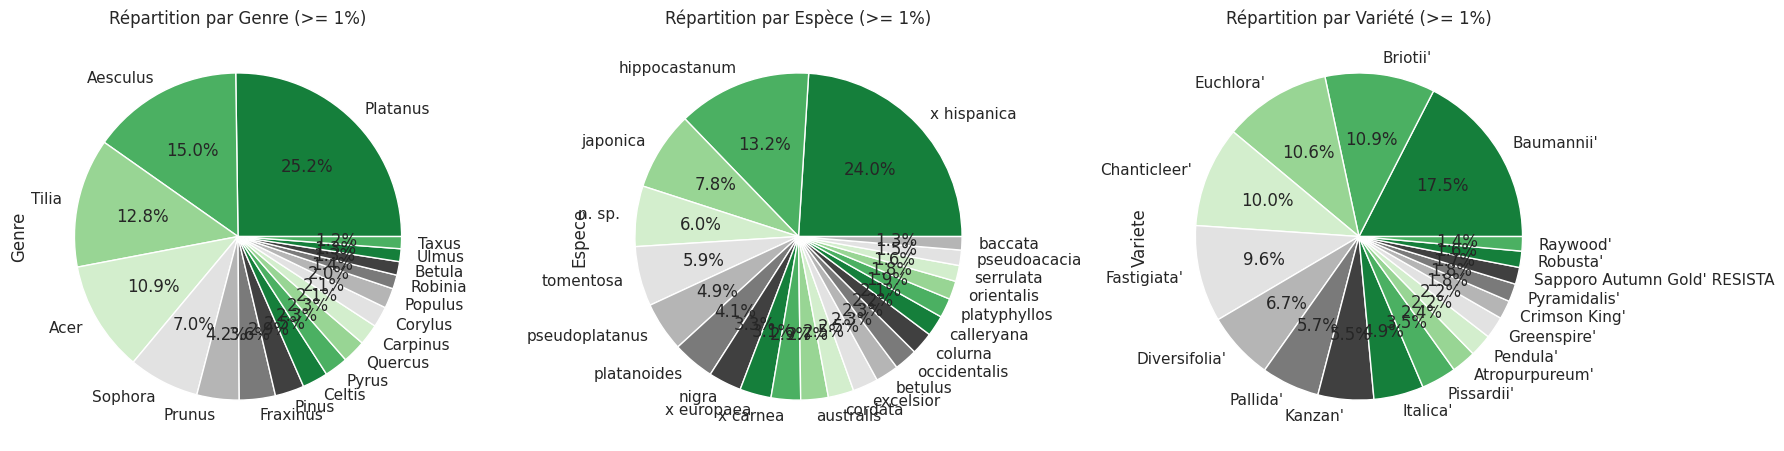

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

threshold = 1
filtered_labels = df['Libelle_Francais'].value_counts(normalize=True) * 100 >= threshold

# Créer une figure avec trois sous-graphiques sur une même ligne
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# couleurs
colors_gray_to_green = sns.color_palette("Greens", n_colors=4)[::-1] + sns.color_palette("Greys", n_colors=4)

df['Stade_Developpement'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors_gray_to_green[:4], ax=axes[0])
axes[0].set_title('Répartition par Développement')

df['Remarquable'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors_gray_to_green[4:], ax=axes[1])
axes[1].set_title('Répartition par Remarquable')

df['Libelle_Francais'][df['Libelle_Francais'].isin(filtered_labels[filtered_labels].index)].value_counts().plot.pie(
    autopct='%1.1f%%', colors=colors_gray_to_green, ax=axes[2])
axes[2].set_title('Répartition par Libelle_Francais (>= {}%)'.format(threshold))

plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Limiter l'affichage à partir de 2% des répartitions par Genre, Espèce et Variété
threshold = 1
filtered_genres = df['Genre'].value_counts(normalize=True) * 100 >= threshold
filtered_species = df['Espece'].value_counts(normalize=True) * 100 >= threshold
filtered_varieties = df['Variete'].value_counts(normalize=True) * 100 >= threshold

# Créer une figure avec trois sous-graphiques sur une même ligne
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Palette de couleurs de gris à vert
colors_gray_to_green = sns.color_palette("Greens", n_colors=4)[::-1] + sns.color_palette("Greys", n_colors=4)

# Répartition par Genre
df['Genre'][df['Genre'].isin(filtered_genres[filtered_genres].index)].value_counts().plot.pie(
    autopct='%1.1f%%', colors=colors_gray_to_green, ax=axes[0])
axes[0].set_title('Répartition par Genre (>= {}%)'.format(threshold))

# Répartition par Espèce
df['Espece'][df['Espece'].isin(filtered_species[filtered_species].index)].value_counts().plot.pie(
    autopct='%1.1f%%', colors=colors_gray_to_green, ax=axes[1])
axes[1].set_title('Répartition par Espèce (>= {}%)'.format(threshold))

# Répartition par Variété
df['Variete'][df['Variete'].isin(filtered_varieties[filtered_varieties].index)].value_counts().plot.pie(
    autopct='%1.1f%%', colors=colors_gray_to_green, ax=axes[2])
axes[2].set_title('Répartition par Variété (>= {}%)'.format(threshold))

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [ ]:
stades = df['Stade_Developpement'].unique()
stades

array([nan, 'Adulte', 'Jeune', 'Mature', 'Jeune Adulte'], dtype=object)

REPARTITION PAR LIBELLE FRANCAIS >= 2%)


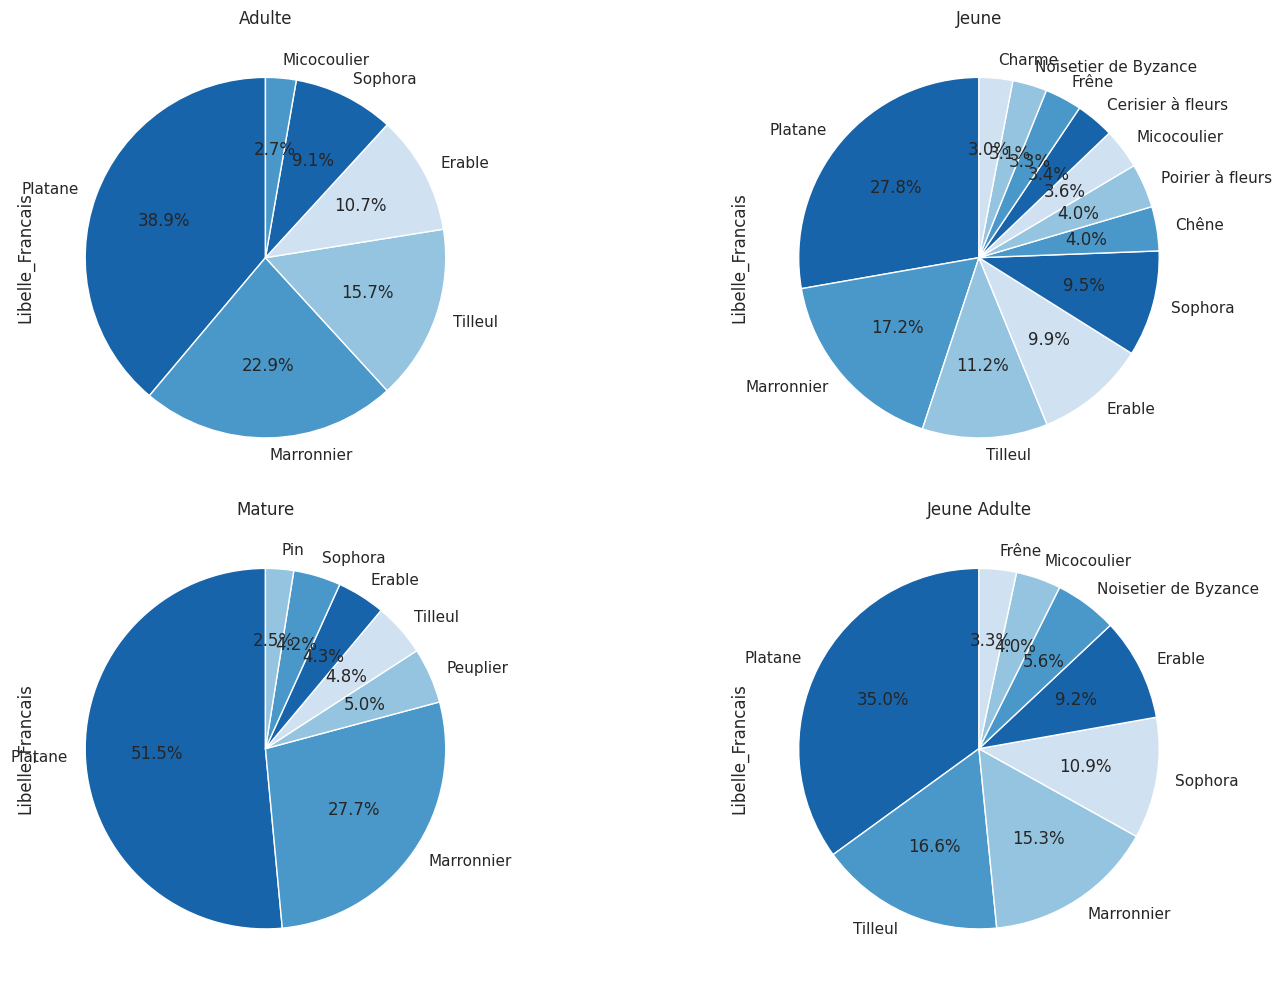

In [ ]:
threshold = 2

# Exclure les lignes où 'Stade_Developpement' est NaN
df_filtered = df.dropna(subset=['Stade_Developpement'])

colors_blue_to_gray = sns.color_palette("Blues_r", n_colors=len(df_filtered['Stade_Developpement'].unique()))
fig, axes = plt.subplots(2, len(df_filtered['Stade_Developpement'].unique()) // 2, figsize=(16, 10))
axes = axes.flatten()

# Parcourir chaque valeur unique de 'Stade_Developpement'
for i, stade in enumerate(df_filtered['Stade_Developpement'].unique()):
    # Sélectionner les données pour le stade actuel
    data_stade = df_filtered[df_filtered['Stade_Developpement'] == stade]

    # Filtrer les libellés avec au moins threshold% d'occurrences
    filtered_labels = data_stade['Libelle_Francais'].value_counts(normalize=True) * 100 >= threshold
    filtered_data = data_stade['Libelle_Francais'][data_stade['Libelle_Francais'].isin(filtered_labels[filtered_labels].index)]

    # Tracer le camembert pour le stade actuel
    filtered_data.value_counts().plot.pie(autopct='%1.1f%%', colors=colors_blue_to_gray, ax=axes[i], startangle=90)

    axes[i].set_title(f"{stade}")

plt.tight_layout()
print(f"REPARTITION PAR LIBELLE FRANCAIS >= {threshold}%)")
plt.show()


<ipython-input-108-d2281757c228>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Stade_Developpement', x='Circonference_Cm', data=df.groupby('Stade_Developpement')['Circonference_Cm'].mean().reset_index(), ax=axes[0], palette=colors_blue_to_gray, order=order)
<ipython-input-108-d2281757c228>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Stade_Developpement', x='Hauteur_M', data=df.groupby('Stade_Developpement')['Hauteur_M'].mean().reset_index(), ax=axes[1], palette=colors_blue_to_gray, order=order)


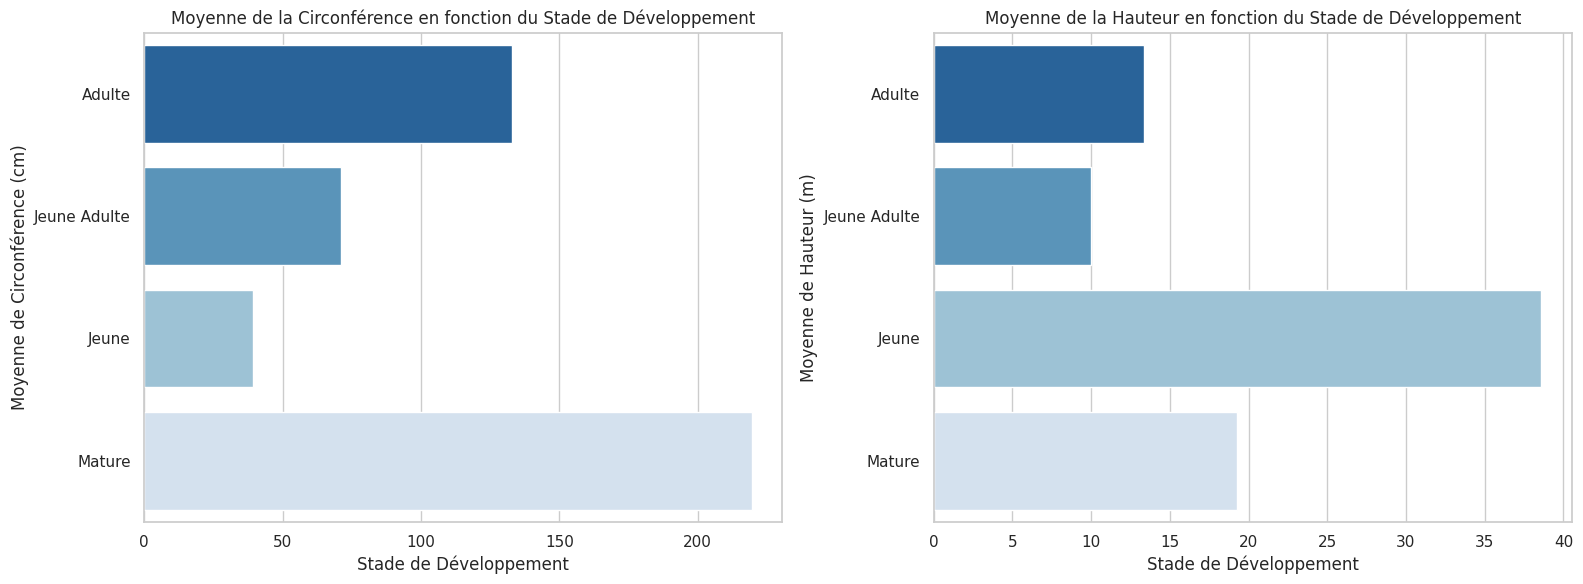

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenez l'ordre croissant des catégories
order = df['Stade_Developpement'].value_counts().index

# Définir le jeu de couleurs avec l'ordre spécifié
colors_blue_to_gray = sns.color_palette("Blues_r", n_colors=len(order))

# Créer un subplot avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Barplot avec le jeu de couleurs et l'ordre spécifié pour la circonférence
sns.barplot(y='Stade_Developpement', x='Circonference_Cm', data=df.groupby('Stade_Developpement')['Circonference_Cm'].mean().reset_index(), ax=axes[0], palette=colors_blue_to_gray, order=order)

# Ajoutez des étiquettes au graphique de circonférence
axes[0].set_title('Moyenne de la Circonférence en fonction du Stade de Développement')
axes[0].set_xlabel('Stade de Développement')
axes[0].set_ylabel('Moyenne de Circonférence (cm)')

# Graphique 2 : Barplot avec le jeu de couleurs pour la hauteur
sns.barplot(y='Stade_Developpement', x='Hauteur_M', data=df.groupby('Stade_Developpement')['Hauteur_M'].mean().reset_index(), ax=axes[1], palette=colors_blue_to_gray, order=order)

# Ajoutez des étiquettes au graphique de hauteur
axes[1].set_title('Moyenne de la Hauteur en fonction du Stade de Développement')
axes[1].set_xlabel('Stade de Développement')
axes[1].set_ylabel('Moyenne de Hauteur (m)')

# Ajustez la disposition pour éviter les chevauchements
plt.tight_layout()

# Affichez le subplot
plt.show()



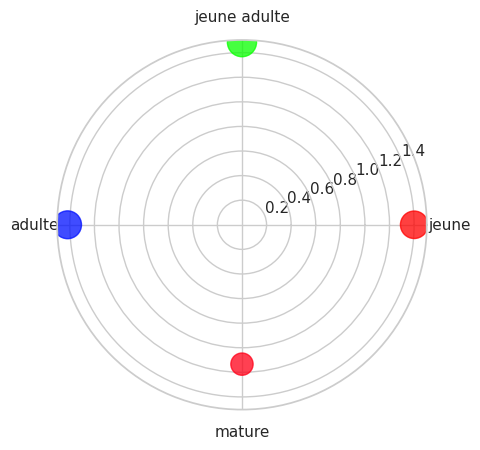

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Suppose df['Stade_Developpement'] contains your categories
categories = ["jeune", "jeune adulte", "adulte", "mature"]

# Sample data
N = len(categories)
theta = np.linspace(0.0, 2*np.pi, N, endpoint=False)
radii = 2 * np.random.rand(N)
area = 200 * radii**2

# Convertir les catégories en indices pour obtenir des couleurs
colors = np.arange(N)

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, radii, c=colors, s=area, cmap='hsv', alpha=0.75)

# Utiliser les catégories comme étiquettes pour chaque angle
ax.set_xticks(theta)
ax.set_xticklabels(categories)

plt.show()


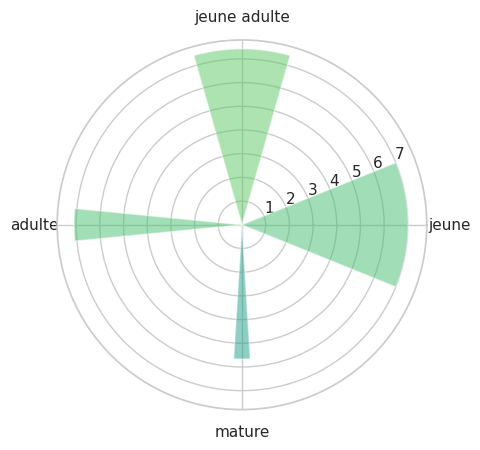

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Suppose df['Stade_Developpement'] contains your categories
categories = ["jeune", "jeune adulte", "adulte", "mature"]

# Sample data
N = len(categories)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)  # Remplacez cela par les données réelles de votre DataFrame
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

# Utiliser les catégories comme étiquettes pour chaque angle
ax.set_xticks(theta)
ax.set_xticklabels(categories)

plt.show()



In [ ]:
# Répartition de Circonference_Cm
circonference_counts = df['Circonference_Cm'].value_counts().sort_index()

# Répartition de Hauteur_M
hauteur_counts = df['Hauteur_M'].value_counts().sort_index()

# Répartition par Arrondissement
arrondissement_counts = df['Arrondissement'].value_counts()

# Afficher les tableaux
print("Répartition de Circonférence (Cm):")
print(circonference_counts)

print("\nRépartition de Hauteur (M):")
print(hauteur_counts)

print("\nRépartition par Arrondissement:")
print(arrondissement_counts)

Répartition de Circonférence (Cm):
0         25867
1             3
2             7
3             8
4             9
          ...  
30140         1
65110         1
79120         1
120170        1
250255        1
Name: Circonference_Cm, Length: 531, dtype: int64

Répartition de Hauteur (M):
0         39219
1           449
2          1441
3          2988
4          4816
          ...  
1815          1
2015          1
2525          1
5155          1
881818        1
Name: Hauteur_M, Length: 143, dtype: int64

Répartition par Arrondissement:
PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16712
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCENNES    11510
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10762
PARIS 18E ARRDT      10011
PARIS 7E ARRDT        8617
VAL-DE-MARNE          7580
PARIS 8E ARRDT        7245
PARIS 11E ARRDT       5658
HAUTS-DE-SEINE        5298
BOIS DE BOULOGNE      3978

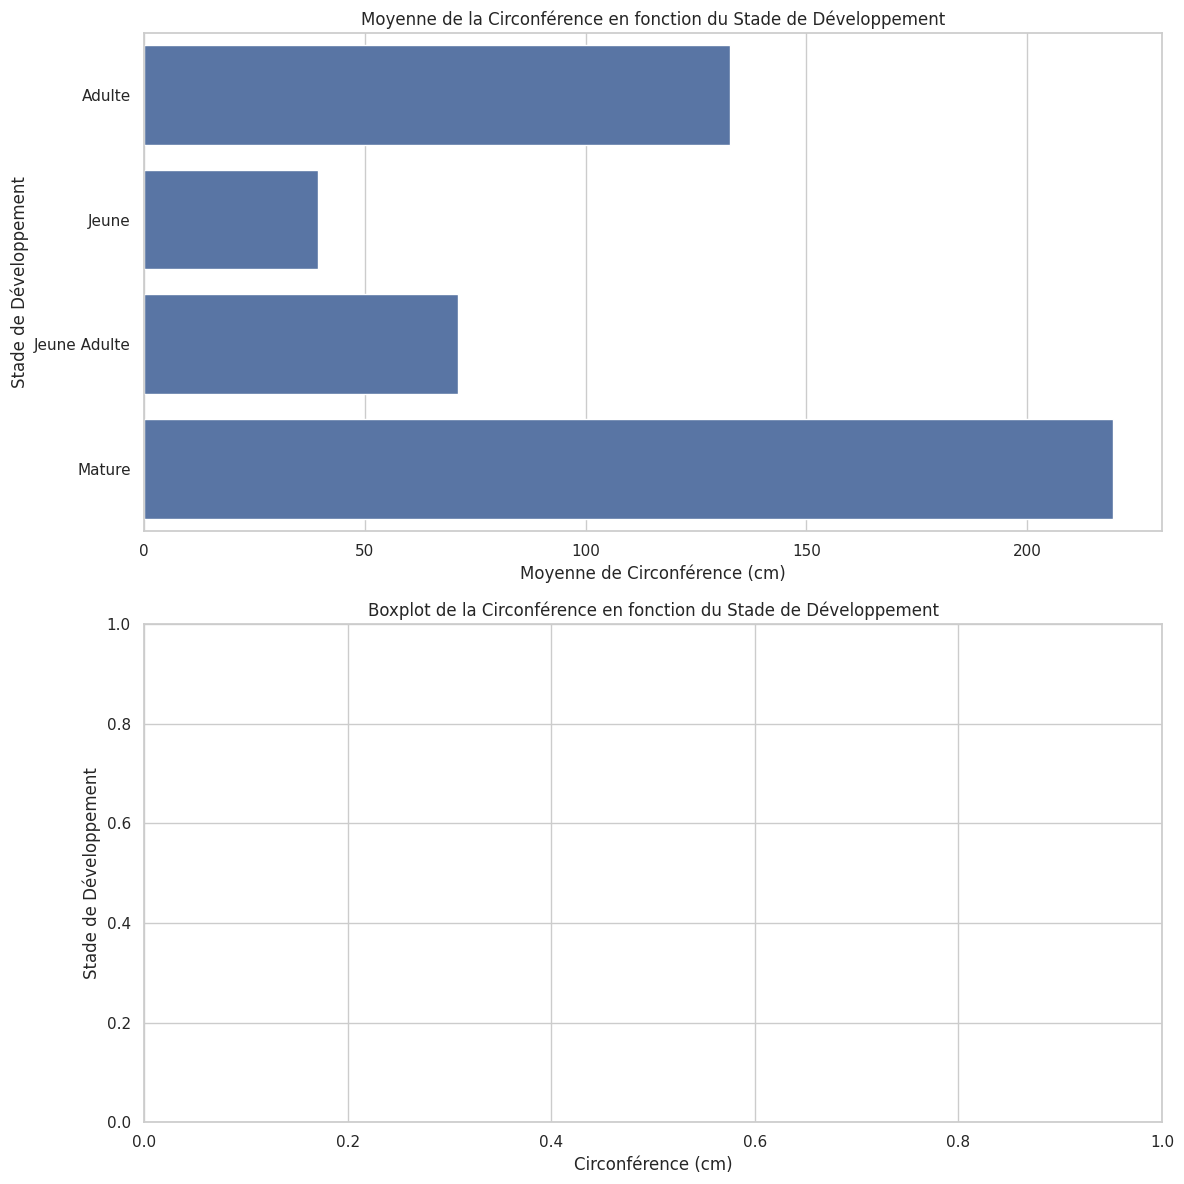

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Moyenne de la circonférence par stade de développement
mean_circumference_by_stage = df.groupby('Stade_Developpement')['Circonference_Cm'].mean().reset_index()

# Création des sous-graphiques
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Graphique 1 : Barplot
sns.barplot(y='Stade_Developpement', x='Circonference_Cm', data=mean_circumference_by_stage, ax=axes[0])

# Ajoutez des étiquettes au graphique
axes[0].set_title('Moyenne de la Circonférence en fonction du Stade de Développement')
axes[0].set_xlabel('Moyenne de Circonférence (cm)')
axes[0].set_ylabel('Stade de Développement')


axes[1].set_title('Boxplot de la Circonférence en fonction du Stade de Développement')
axes[1].set_xlabel('Circonférence (cm)')
axes[1].set_ylabel('Stade de Développement')

plt.tight_layout()
plt.show()

### **L'utilisation de l'échelle logarithmique :**

est souvent bénéfique lorsque les données couvrent plusieurs ordres de grandeur. Cela rendre l'histogramme plus lisible, en particulier lorsque des valeurs très grandes et très petites sont dans le même ensemble de données. Cela permet de mieux visualiser la distribution des valeurs sur un spectre plus large.

L'histogramme est étiré sur l'axe x et l'échelle logarithmique est appliquée, cela peut indiquer que les valeurs de la circonférence couvrent plusieurs ordres de grandeur, allant des petites valeurs aux grandes valeurs.


**Répartition des Circonférences (Cm) :**

La majorité des arbres ont une circonférence comprise entre 0 et environ 200 cm, car la barre la plus haute est dans cette plage.
Il y a moins d'arbres avec des circonférences plus grandes, indiqué par la diminution des barres à droite.

**Répartition des Hauteurs (M) :**

La majorité des arbres ont une hauteur inférieure à 20 mètres, car la barre la plus haute est dans cette plage.
Il y a moins d'arbres très grands, indiqué par la diminution des barres à droite.

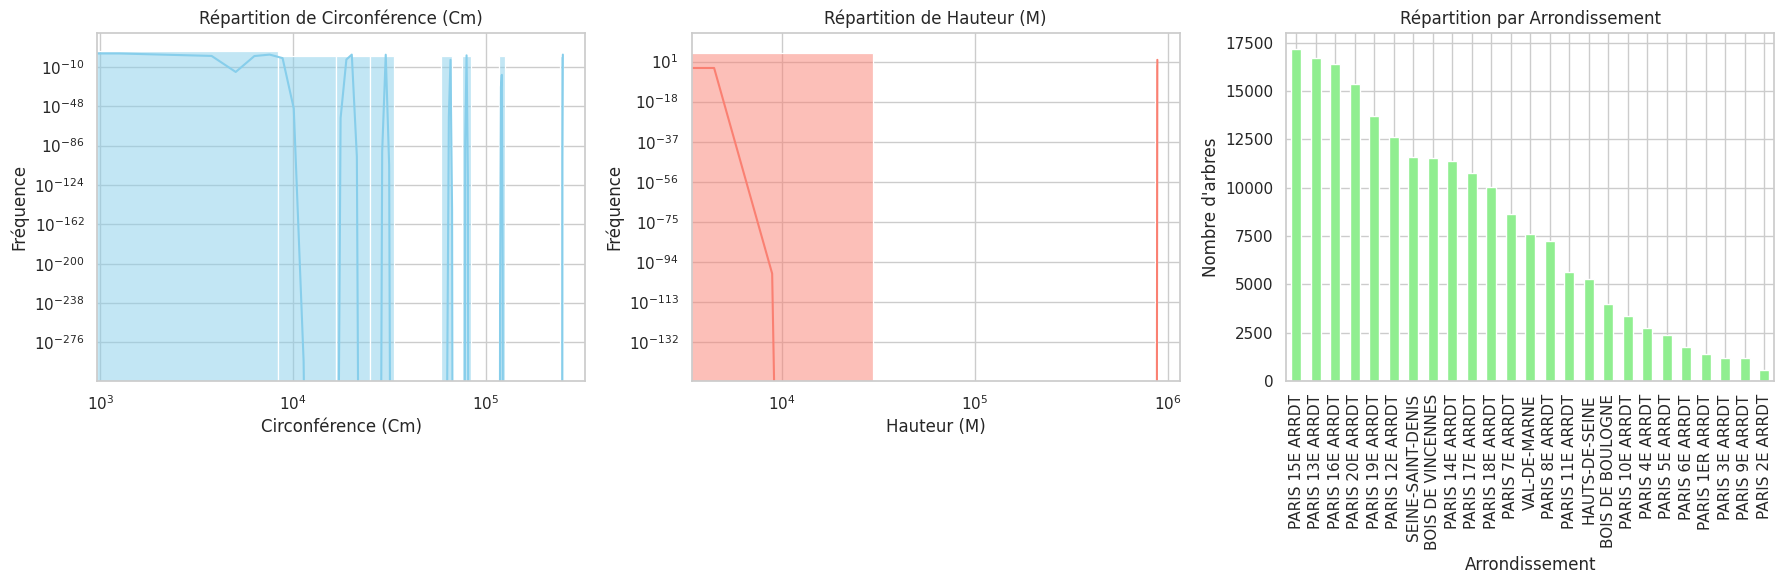

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une figure avec trois sous-graphiques sur une même ligne
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Premier graphique : Répartition de Circonference_Cm
sns.histplot(df['Circonference_Cm'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Répartition de Circonférence (Cm)')
axes[0].set_xlabel('Circonférence (Cm)')
axes[0].set_ylabel('Fréquence')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# Deuxième graphique : Répartition de Hauteur_M
sns.histplot(df['Hauteur_M'], bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Répartition de Hauteur (M)')
axes[1].set_xlabel('Hauteur (M)')
axes[1].set_ylabel('Fréquence')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

# Troisième graphique : Répartition de Arrondissement
df['Arrondissement'].value_counts().plot(kind='bar', color='lightgreen', ax=axes[2])
axes[2].set_title('Répartition par Arrondissement')
axes[2].set_xlabel('Arrondissement')
axes[2].set_ylabel('Nombre d\'arbres')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### **DECOUVERTE DE LA DATA PAR ARRONDISSEMENTS**

<ipython-input-114-8dfa199e031d>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Arrondissement", y="Hauteur_M", data=df, estimator=sum, palette="viridis", ax=axes[0], ci=None, dodge=False)
<ipython-input-114-8dfa199e031d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Arrondissement", y="Hauteur_M", data=df, estimator=sum, palette="viridis", ax=axes[0], ci=None, dodge=False)
<ipython-input-114-8dfa199e031d>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Arrondissement", y="Circonference_Cm", data=df, palette="viridis", ax=axes[1], ci=None, dodge=False)
<ipython-input-114-8dfa199e031d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

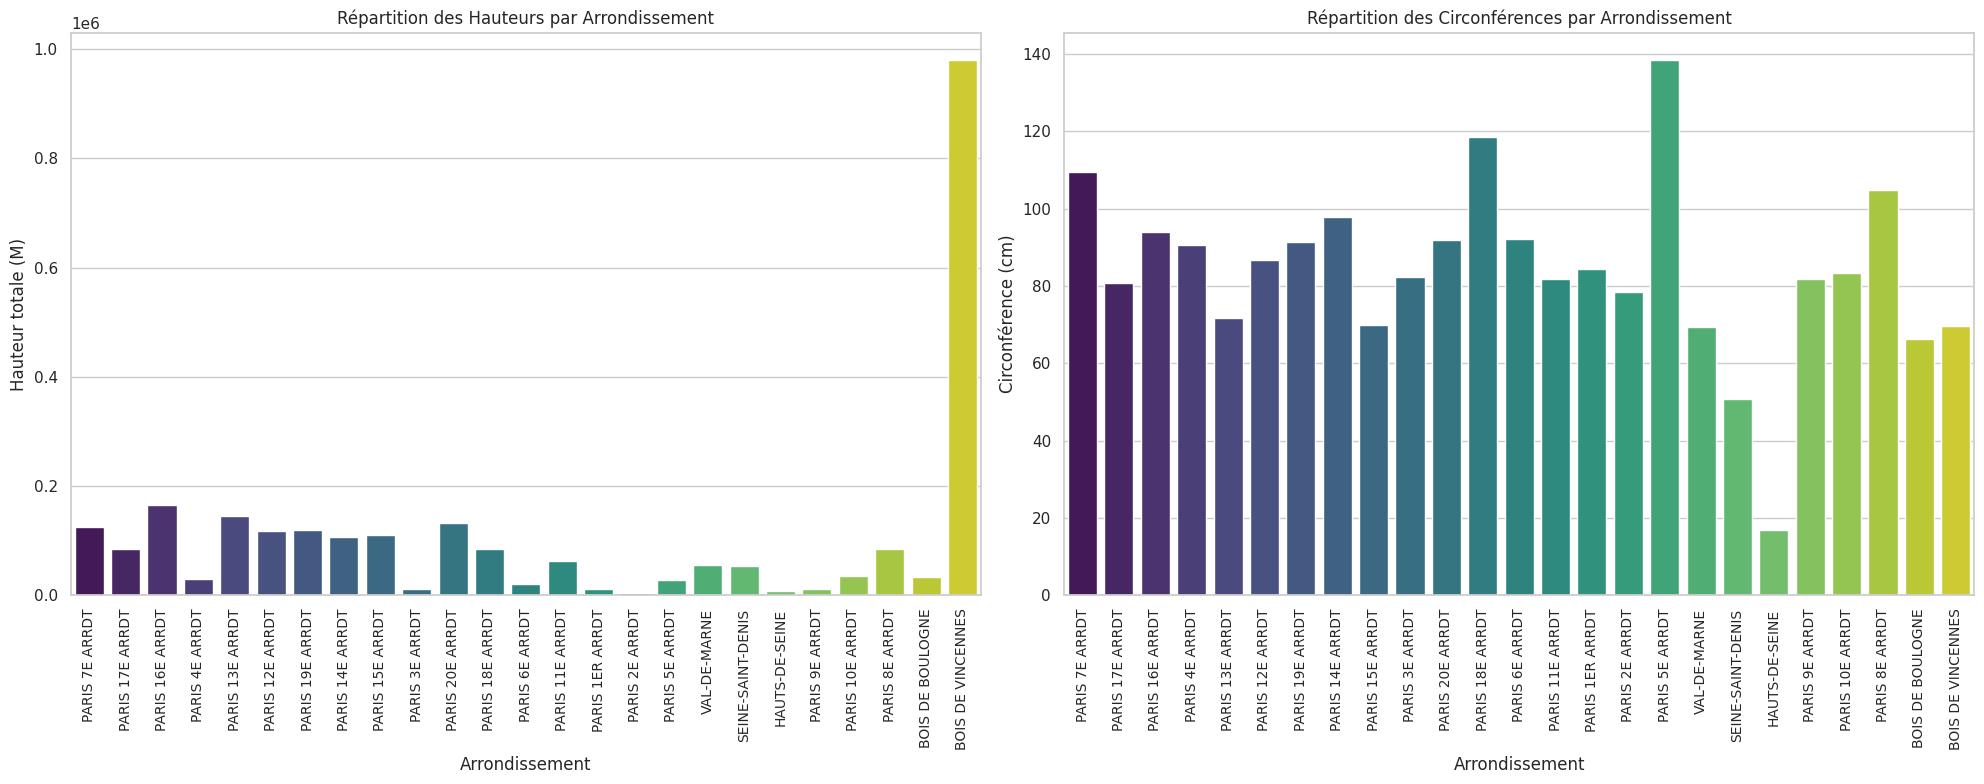

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x="Arrondissement", y="Hauteur_M", data=df, estimator=sum, palette="viridis", ax=axes[0], ci=None, dodge=False)
axes[0].set_title('Répartition des Hauteurs par Arrondissement')
axes[0].set_xlabel('Arrondissement')
axes[0].set_ylabel('Hauteur totale (M)')

sns.barplot(x="Arrondissement", y="Circonference_Cm", data=df, palette="viridis", ax=axes[1], ci=None, dodge=False)
axes[1].set_title('Répartition des Circonférences par Arrondissement')
axes[1].set_xlabel('Arrondissement')
axes[1].set_ylabel('Circonférence (cm)')

# pivoter étiquettes d'arrondissement
axes[0].tick_params(axis='x', rotation=90, labelsize=10) #  taille de la police ici
axes[1].tick_params(axis='x', rotation=90, labelsize=10)

plt.tight_layout()
plt.show()


TOP 5 LIBELLE FRANCAIS


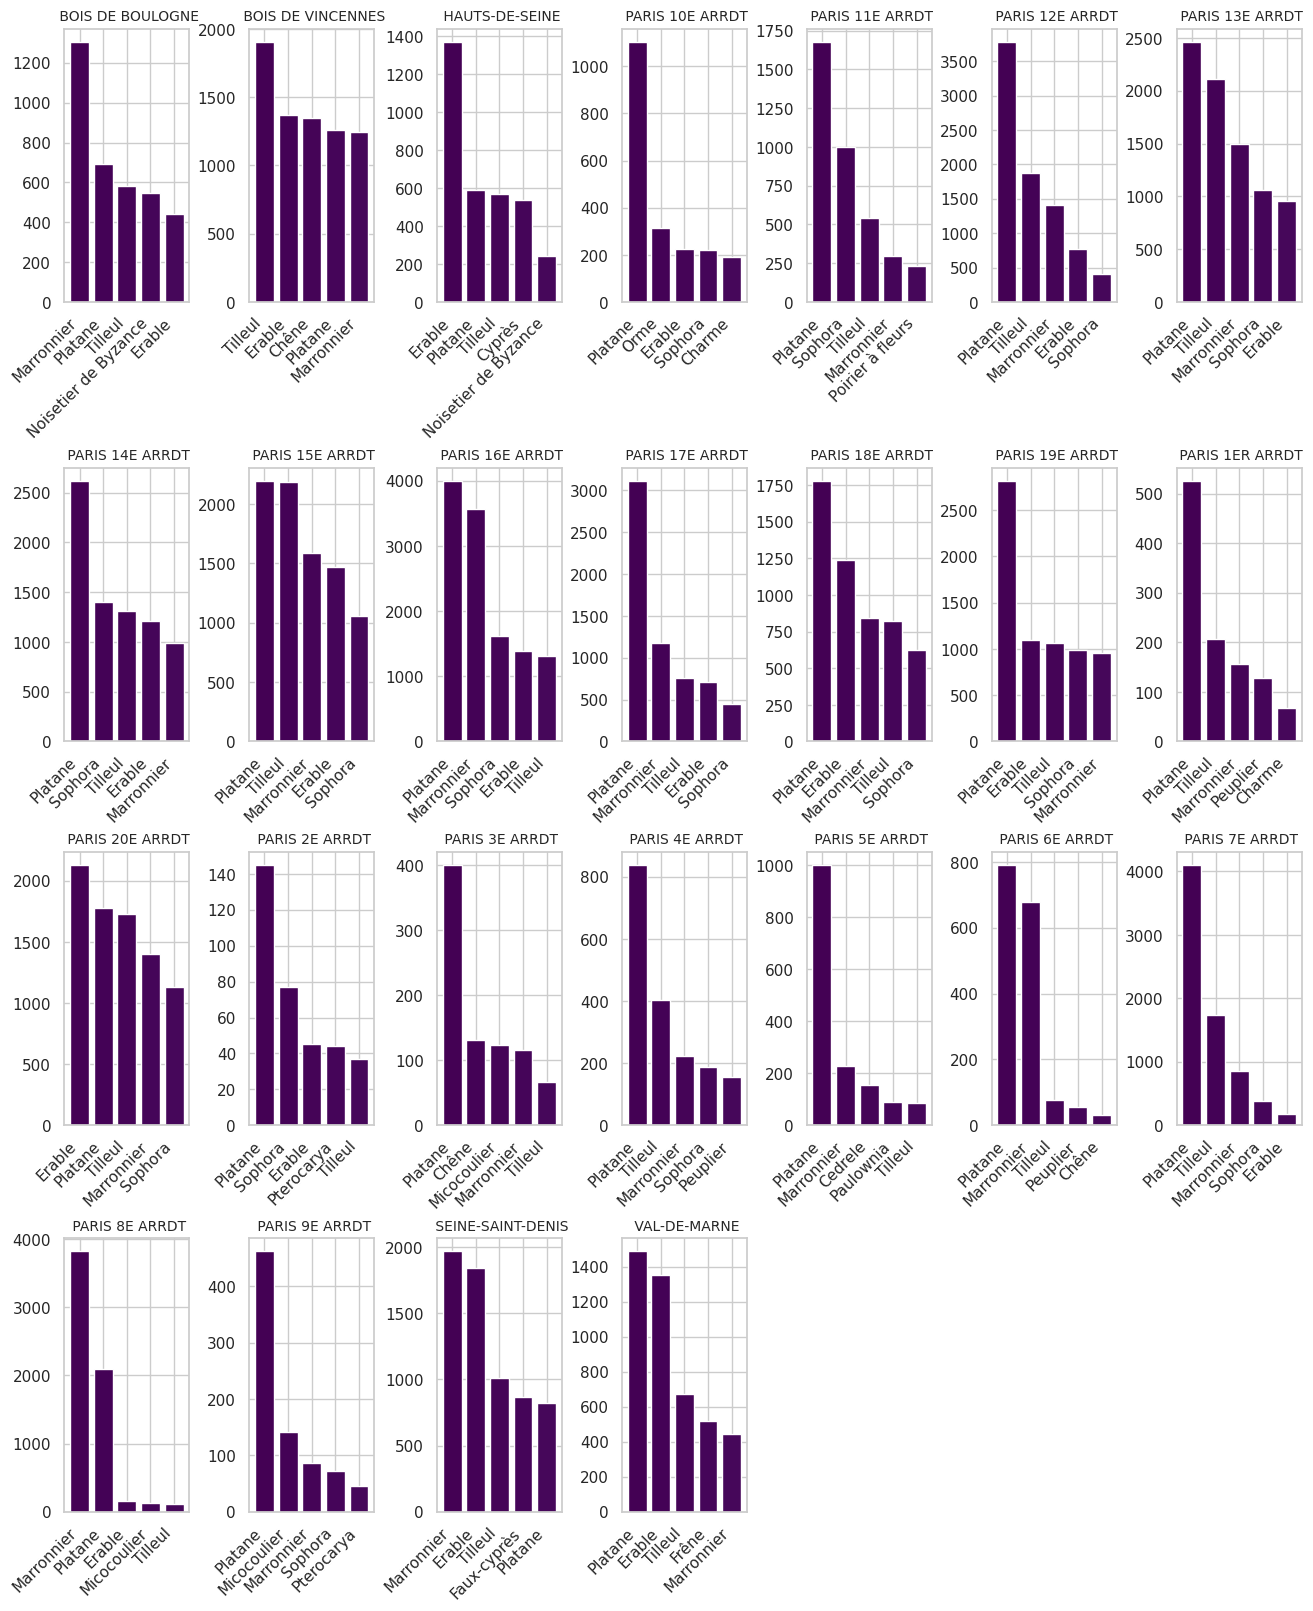

In [ ]:
print('TOP 5 LIBELLE FRANCAIS')
top_labels_df = df.groupby(['Arrondissement', 'Libelle_Francais']).size().groupby('Arrondissement', group_keys=False).nlargest(5).reset_index(name='Frequency')
top_labels_df = top_labels_df.sort_values(['Arrondissement', 'Frequency'], ascending=[True, False])

# Calcul du nombre total de graphiques
total_plots = len(top_labels_df['Arrondissement'].unique())

# Définition du nombre de graphiques par ligne
graphs_per_row = 7

# Calcul du nombre total de lignes
total_rows = -(-total_plots // graphs_per_row)

# Création du graphique
fig, axes = plt.subplots(total_rows, graphs_per_row, figsize=(13, total_rows*4), constrained_layout=True)

# Obtenir la fonction de cartographie des couleurs
cmap = plt.get_cmap('viridis')

for i, (arrondissement, data) in enumerate(top_labels_df.groupby('Arrondissement')):
    row = i // graphs_per_row
    col = i % graphs_per_row

    ax = axes[row, col] if total_rows > 1 else axes[col]

    # Appliquer la couleur de la carte de couleurs aux barres
    bars = ax.bar(data['Libelle_Francais'], data['Frequency'], color=cmap(range(len(data))))

    ax.set_title(f' {arrondissement}', fontsize=10)
    # ax.set_xlabel('Libelle_Francais')
    # ax.set_ylabel('Frequency')

    # Utiliser set_xticks pour définir les positions des étiquettes
    ax.set_xticks(range(len(data['Libelle_Francais'])))
    # Utiliser set_xticklabels pour définir les étiquettes
    ax.set_xticklabels(data['Libelle_Francais'], rotation=45, ha='right', fontsize=11)


# Supprimer les sous-graphiques inutilisés
for i in range(total_plots, total_rows * graphs_per_row):
    row = i // graphs_per_row
    col = i % graphs_per_row
    fig.delaxes(axes[row, col] if total_rows > 1 else axes[col])

plt.show()

### **DECOUVERTE DES ESPECES GENRES ET LIBELLES**
Cela permettra de mettre en lumière les espèces genres et libellés, ainsi que les diférentes combinaisons les plus communes.

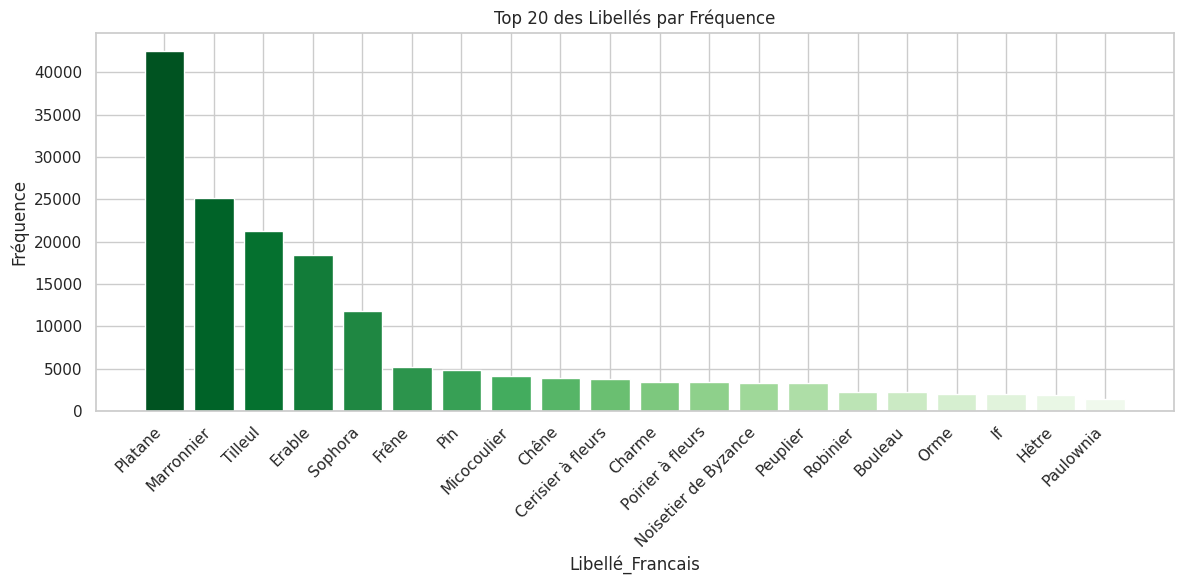

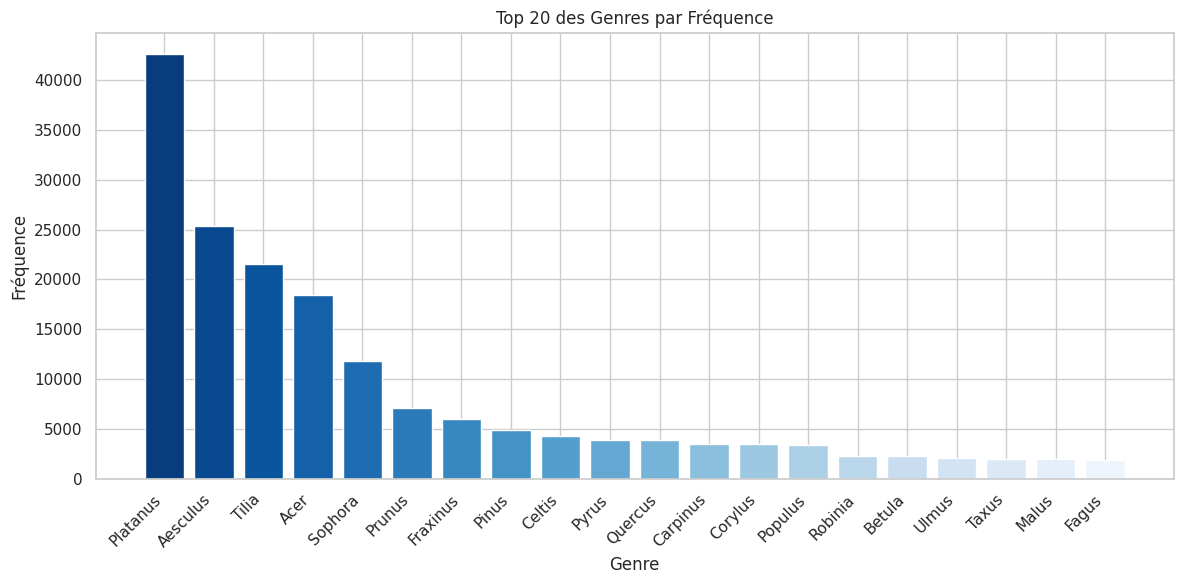

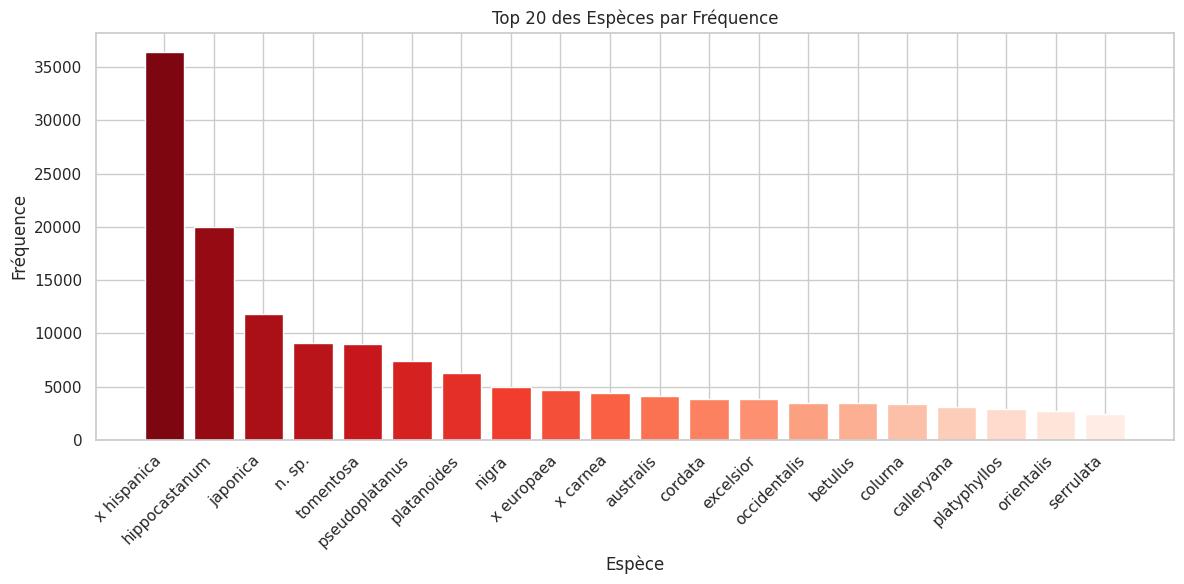

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limiter l'affichage aux 20 libellés les plus fréquents
top_labels_df = df['Libelle_Francais'].value_counts().nlargest(20).reset_index(name='Frequency')

# Définir la palette de couleurs
colors_gray_to_green = sns.color_palette("Greens", n_colors=20)[::-1]

# Créer un graphique pour le top 20 des libellés
plt.figure(figsize=(12, 6))
bars = plt.bar(top_labels_df['index'], top_labels_df['Frequency'], color=colors_gray_to_green)

plt.title('Top 20 des Libellés par Fréquence')
plt.xlabel('Libellé_Francais')
plt.ylabel('Fréquence')

# Utiliser set_xticklabels avec rotation pour l'alignement horizontal
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
##########################
# Limiter l'affichage aux 20 genres les plus fréquents
top_genres_df = df['Genre'].value_counts().nlargest(20).reset_index(name='Frequency')

# Définir la palette de couleurs
colors_gray_to_green = sns.color_palette("Blues", n_colors=20)[::-1]

# Créer un graphique pour le top 20 des genres
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genres_df['index'], top_genres_df['Frequency'], color=colors_gray_to_green)

plt.title('Top 20 des Genres par Fréquence')
plt.xlabel('Genre')
plt.ylabel('Fréquence')

# Utiliser set_xticklabels avec rotation pour l'alignement horizontal
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
######################################
import matplotlib.pyplot as plt
import seaborn as sns

# Limiter l'affichage aux 20 espèces les plus fréquentes
top_species_df = df['Espece'].value_counts().nlargest(20).reset_index(name='Frequency')

# Définir la palette de couleurs
colors_gray_to_green = sns.color_palette("Reds", n_colors=20)[::-1]

# Créer un graphique pour le top 20 des espèces
plt.figure(figsize=(12, 6))
bars = plt.bar(top_species_df['index'], top_species_df['Frequency'], color=colors_gray_to_green)

plt.title('Top 20 des Espèces par Fréquence')
plt.xlabel('Espèce')
plt.ylabel('Fréquence')

# Utiliser set_xticklabels avec rotation pour l'alignement horizontal
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Top 20 des Combinaisons de Libellé, Genre et Espèce par Fréquence


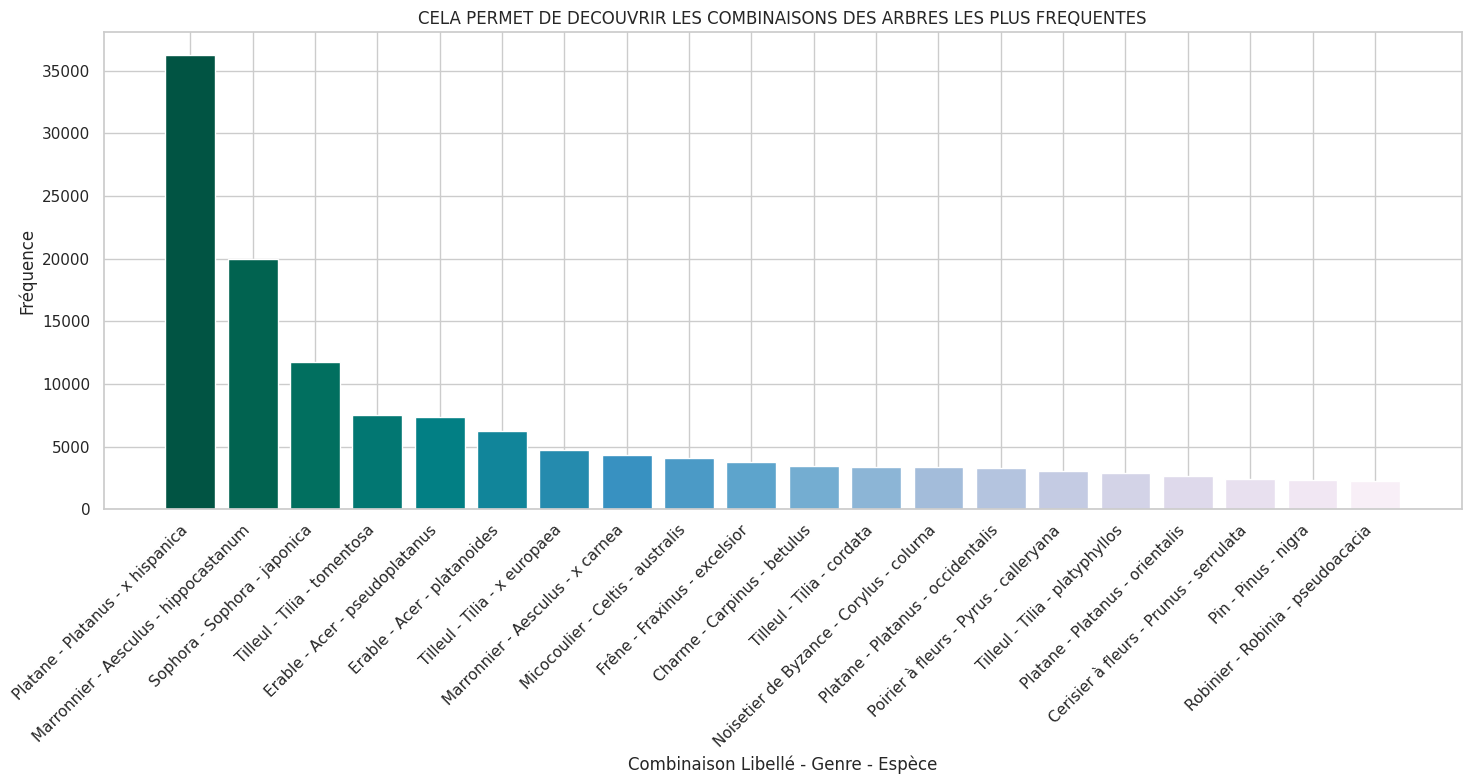

In [ ]:
# Limiter l'affichage aux 20 combinaisons les plus fréquentes de libellé, genre et espèce
top_combinations_df = df.groupby(['Libelle_Francais', 'Genre', 'Espece']).size().nlargest(20).reset_index(name='Frequency')

# Créer une nouvelle colonne combinant libellé, genre et espèce
top_combinations_df['Combined_Labels'] = top_combinations_df['Libelle_Francais'] + " - " + top_combinations_df['Genre'] + " - " + top_combinations_df['Espece']

# Définir la palette de couleurs
colors_gray_to_green = sns.color_palette("PuBuGn", n_colors=20)[::-1]

# Créer un graphique pour le top 20 des combinaisons
plt.figure(figsize=(15, 8))
bars = plt.bar(top_combinations_df['Combined_Labels'], top_combinations_df['Frequency'], color=colors_gray_to_green)

print('Top 20 des Combinaisons de Libellé, Genre et Espèce par Fréquence')
plt.title('CELA PERMET DE DECOUVRIR LES COMBINAISONS DES ARBRES LES PLUS FREQUENTES')
plt.xlabel('Combinaison Libellé - Genre - Espèce')
plt.ylabel('Fréquence')

# Utiliser set_xticklabels avec rotation pour l'alignement horizontal
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### **CARTOGRAPHIE**

In [ ]:
#vérification
print(df['Geo_Point_2D_A'])


0         48.857620
1         48.857656
2         48.857705
3         48.857722
4         48.890435
            ...    
200132    48.821957
200133    48.823254
200134    48.822907
200135    48.822522
200136    48.820445
Name: Geo_Point_2D_A, Length: 200137, dtype: float64


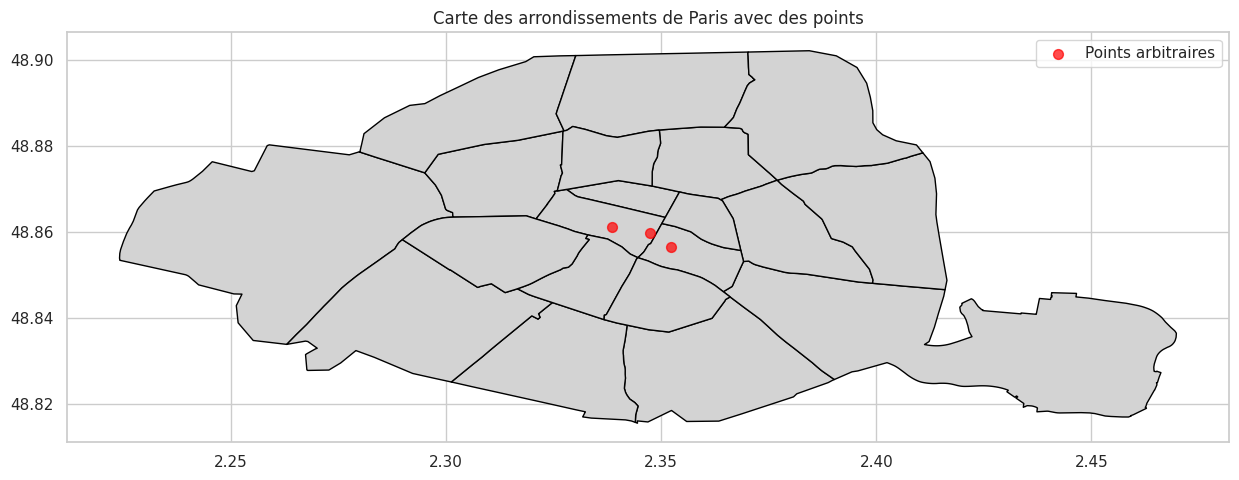

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger le GeoDataFrame des arrondissements de Paris
paris_arrondissements_url = 'https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr'
paris_arrondissements = gpd.read_file(paris_arrondissements_url)

# Créer trois points arbitraires
points = {'Latitude': [48.8566, 48.8599, 48.8611],
          'Longitude': [2.3522, 2.3475, 2.3386]}
df_points = pd.DataFrame(points)

# Convertir les coordonnées en géométries
geometry = gpd.points_from_xy(df_points['Longitude'], df_points['Latitude'])

# Créer un GeoDataFrame avec les points
gdf_points = gpd.GeoDataFrame(df_points, geometry=geometry)

# Afficher la carte des arrondissements de Paris avec les points
fig, ax = plt.subplots(figsize=(15, 15))
paris_arrondissements.plot(ax=ax, color='lightgray', edgecolor='black')
gdf_points.plot(ax=ax, color='red', markersize=50, alpha=0.7, label='Points arbitraires')

# Ajouter des détails, comme le titre et la légende
ax.set_title('Carte des arrondissements de Paris avec des points')
ax.legend()

plt.show()


In [ ]:
!pip install folium
!pip install  folium.plugins

In [ ]:
import folium
import geopandas as gpd

# Charger le GeoDataFrame des arrondissements de Paris
paris_arrondissements_url = 'https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr'
paris_arrondissements = gpd.read_file(paris_arrondissements_url)

# Créer une carte centrée sur Paris
paris_map = folium.Map(location=[48.8566, 2.3522], zoom_start=13)

# Convertir le GeoDataFrame en GeoJSON
paris_geojson = paris_arrondissements.to_json()

# Ajouter le GeoJSON à la carte
folium.GeoJson(paris_geojson).add_to(paris_map)

# Créer les points géométriques
geometry = gpd.points_from_xy(df['Geo_Point_2D_B'], df['Geo_Point_2D_A'])
gdf_points = gpd.GeoDataFrame(df, geometry=geometry)

# Ajouter chaque point à la carte
for _, row in gdf_points.iterrows():
    folium.Marker(location=[row['Geo_Point_2D_A'], row['Geo_Point_2D_B']]).add_to(paris_map)

# Afficher la carte
paris_map

In [ ]:
# Charger le GeoDataFrame des arrondissements de Paris
paris_arrondissements_url = 'https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr'
paris_arrondissements = gpd.read_file(paris_arrondissements_url)

# Convertir en un CRS projeté
paris_arrondissements = paris_arrondissements.to_crs("EPSG:4326")

geometry = gpd.points_from_xy(df['Geo_Point_2D_B'], df['Geo_Point_2D_A'])

gdf_points = gpd.GeoDataFrame(df, geometry=geometry)

# Afficher la carte des arrondissements de Paris avec les points de votre DataFrame
fig, ax = plt.subplots(figsize=(40, 70))
paris_arrondissements.plot(ax=ax, color='lightgray', edgecolor='red')
gdf_points.plot(ax=ax, color='green', markersize=1, alpha=0.7, label='Points de df')

# Vérifier si 'Arrondissement' est dans les colonnes
if 'Arrondissement' in df.columns:
    # Ajouter le numéro des arrondissements
    for x, y, label in zip(gdf_points.geometry.centroid.x, gdf_points.geometry.centroid.y, df['Arrondissement']):
        ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points")
else:
    print("'Arrondissement' n'est pas trouvé dans les colonnes du DataFrame.")

ax.set_title('Carte des arrondissements de Paris avec les points de df')
ax.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
print(paris_arrondissements.columns)

Index(['c_ar', 'l_aroff', 'surface', 'l_ar', 'n_sq_co', 'c_arinsee', 'n_sq_ar',
       'perimetre', 'geometry'],
      dtype='object')


In [ ]:
# Charger le GeoDataFrame des arrondissements de Paris
paris_arrondissements_url = 'https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr'
paris_arrondissements = gpd.read_file(paris_arrondissements_url)

geometry = gpd.points_from_xy(df['Geo_Point_2D_B'], df['Geo_Point_2D_A'])

gdf_points = gpd.GeoDataFrame(df, geometry=geometry)

# Afficher la carte des arrondissements de Paris avec les points de votre DataFrame
fig, ax = plt.subplots(figsize=(40, 70))
paris_arrondissements.plot(ax=ax, color='whitesmoke', edgecolor='red')
gdf_points.plot(ax=ax, color='green', markersize=1, alpha=0.7, label='Points de df')

# Ajouter le nom des arrondissements
for x, y, label in zip(gdf_points.geometry.centroid.x, gdf_points.geometry.centroid.y, gdf_points['Arrondissement']):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points")

ax.set_title('Carte des arrondissements de Paris avec les points de df')
ax.legend()
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

geometry = gpd.points_from_xy(df["Geo_Point_2D_A"], df["Geo_Point_2D_B"])
geo = gpd.GeoDataFrame(df, crs='epsg:4326', geometry=geometry)

fig, ax = plt.subplots(figsize=(, 15))

geo.plot(ax=ax, column=geo['Arrondissement'], cmap='viridis', marker='.', markersize=20, legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5)})

# Ajouter un fond de carte OpenStreetMap
ctx.add_basemap(ax, crs=geo.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
fig.tight_layout()
plt.title("Arrondissement")
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

geometry = gpd.points_from_xy(df["Geo_Point_2D_A"], df["Geo_Point_2D_B"])
geo = gpd.GeoDataFrame(df, crs='epsg:4326', geometry=geometry)

fig, ax = plt.subplots(figsize=(40, 15))

geo.plot(ax=ax, column=geo['Arrondissement'], cmap='viridis', marker='.', markersize=20, legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5)})

# Ajouter un fond de carte Stamen Terrain
ctx.add_basemap(ax, crs=geo.crs.to_string(), source=ctx.providers.Stamen.Terrain)

ax.set_axis_off()
fig.tight_layout()
plt.title("Arrondissement")
plt.show()


In [ ]:
# df['Circonference_Par_Type_Emplacement'] = df.groupby('Type_Emplacement')['Circonference_Cm'].transform('sum')
# df['Circonference_Par_Domanialite'] = df.groupby('Domanialite')['Circonference_Cm'].transform('sum')
# df['Circonference_Par_Arrondissement'] = df.groupby('Arrondissement')['Circonference_Cm'].transform('sum')
# df['Circonference_Par_Lieu'] = df.groupby('Lieu')['Circonference_Cm'].transform('sum')
# df['Circonference_Par_Libelle_Francais'] = df.groupby('Libelle_Francais')['Circonference_Cm'].transform('sum')
# df['Circonference_Par_Genre'] = df.groupby('Genre')['Circonference_Cm'].transform('sum')
# df['Circonference_Par_Espece'] = df.groupby('Espece')['Circonference_Cm'].transform('sum')
# df['Circonference_Par_Variete'] = df.groupby('Variete')['Circonference_Cm'].transform('sum')
# df['Circonference_Par_Stade_Developpement'] = df.groupby('Stade_Developpement')['Circonference_Cm'].transform('sum')
# df['Circonference_Par_Remarquable'] = df.groupby('Remarquable')['Circonference_Cm'].transform('sum')
# Circonference_df = df[['Circonference_Par_Type_Emplacement', 'Circonference_Par_Domanialite', 'Circonference_Par_Arrondissement', 'Circonference_Par_Lieu', 'Circonference_Par_Libelle_Francais', 'Circonference_Par_Genre', 'Circonference_Par_Espece', 'Circonference_Par_Variete', 'Circonference_Par_Stade_Developpement', 'Circonference_Par_Remarquable']]

In [ ]:
# df['Densite_Par_Type_Emplacement'] = df.groupby('Type_Emplacement')['Id'].transform('count') / df['Surface_Au_Sol']
# df['Densite_Par_Domanialite'] = df.groupby('Domanialite')['Id'].transform('count') / df['Surface_Au_Sol']
# df['Densite_Par_Arrondissement'] = df.groupby('Arrondissement')['Id'].transform('count') / df['Surface_Au_Sol']
# df['Densite_Par_Lieu'] = df.groupby('Lieu')['Id'].transform('count') / df['Surface_Au_Sol']
# df['Densite_Par_Libelle_Francais'] = df.groupby('Libelle_Francais')['Id'].transform('count') / df['Surface_Au_Sol']
# df['Densite_Par_Genre'] = df.groupby('Genre')['Id'].transform('count') / df['Surface_Au_Sol']
# df['Densite_Par_Espece'] = df.groupby('Espece')['Id'].transform('count') / df['Surface_Au_Sol']
# df['Densite_Par_Variete'] = df.groupby('Variete')['Id'].transform('count') / df['Surface_Au_Sol']
# df['Densite_Par_Stade_Developpement'] = df.groupby('Stade_Developpement')['Id'].transform('count') / df['Surface_Au_Sol']
# df['Densite_Par_Remarquable'] = df.groupby('Remarquable')['Id'].transform('count') / df['Surface_Au_Sol']
# Densite_df = df[['Densite_Par_Type_Emplacement', 'Densite_Par_Domanialite', 'Densite_Par_Arrondissement', 'Densite_Par_Lieu', 'Densite_Par_Libelle_Francais', 'Densite_Par_Genre', 'Densite_Par_Espece', 'Densite_Par_Variete', 'Densite_Par_Stade_Developpement', 'Densite_Par_Remarquable']]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Densite_Par_Type_Emplacement')
# Calculer la densité par type d'emplacement
df['Densite_Par_Type_Emplacement'] = df.groupby('Type_Emplacement')['Id'].transform('count') / df['Surface_Au_Sol']

# Créer un histogramme
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Densite_Par_Type_Emplacement', hue='Type_Emplacement', multiple="stack")
plt.title('Densité par type d\'emplacement')
plt.xlabel('Densité')
plt.ylabel('Nombre')
plt.show()


In [ ]:
df['Nombre_Arbres_Par_Libelle_Francais'] = df.groupby('Libelle_Francais')['Id'].transform('count')
df['Circonference_Somme_Par_Libelle_Francais'] = df.groupby('Libelle_Francais')['Circonference_Cm'].transform('sum')
df['Circonference_Moyenne_Par_Libelle_Francais'] = df.groupby('Libelle_Francais')['Circonference_Cm'].transform('mean')
df['Hauteur_Moyenne_Par_Libelle_Francais'] = df.groupby('Libelle_Francais')['Hauteur_M'].transform('mean')
df['Nombre_Arbres_Remarkables_Par_Libelle_Francais'] = df[df['Remarquable'] == 1].groupby('Libelle_Francais')['Id'].transform('count')


In [ ]:
# 4. Nombre d'espèces différentes par lieu
df['Nombre_Especes_Par_Lieu'] = df.groupby('Lieu')['Espece'].transform('nunique')

In [ ]:
df['Domanialite_Par_Libelle_Francais'] = df.groupby('Libelle_Francais')['Domanialite'].transform('count')
df.head(400)

### **◆ Synthèse de l’analyse de données.**
